In [4]:
import pandas as pd
x = [ { 'a' :2, 'b' : 'x', 'c' : 10, 'd' : { 'x' : 1, 'y' : 'tim'}}, 
      { 'a' :4, 'b' : 'y', 'c' : 3},
      { 'a' :1, 'b' : 'x', 'c' : 6, 'd' : { 'x' : 2}} ]
y = pd.DataFrame(x) # Raw
z = pd.json_normalize(x) #Flatten nested values

In [5]:
y

,a,b,c,d
0,2,x,10,"{'x': 1, 'y': 'tim'}"
1,4,y,3,NaN
2,1,x,6,{'x': 2}


In [6]:
z

,a,b,c,d.x,d.y
0,2,x,10,1.0,tim
1,4,y,3,NaN,NaN
2,1,x,6,2.0,NaN


In [8]:
y[  y['b'] == 'x' ]

,a,b,c,d
0,2,x,10,"{'x': 1, 'y': 'tim'}"
2,1,x,6,{'x': 2}


In [9]:
y['b'] == 'x'

0     True
1    False
2     True
Name: b, dtype: bool

In [10]:
y[  y.b == 'x' ]

,a,b,c,d
0,2,x,10,"{'x': 1, 'y': 'tim'}"
2,1,x,6,{'x': 2}


In [11]:
y[???????]
# 1. Boolean filter df['col'] == val 
#    FILTER ROWS<<OR>>
# 2. List of columns 
#    FILTERS COLUMNS

SyntaxError: invalid syntax (2269444880.py, line 1)

In [12]:
y[ ['a','b'] ]

,a,b
0,2,x
1,4,y
2,1,x


In [13]:
y[ y['b']=='x' ]

,a,b,c,d
0,2,x,10,"{'x': 1, 'y': 'tim'}"
2,1,x,6,{'x': 2}


In [14]:
y[ ['a','b'] ][ y['b']=='x' ]


,a,b
0,2,x
2,1,x


In [17]:
y

,a,b,c,d
0,2,x,10,"{'x': 1, 'y': 'tim'}"
1,4,y,3,NaN
2,1,x,6,{'x': 2}


In [21]:
y[ ['c'] ]

,c
0,10
1,3
2,6


In [22]:
y[ ['c'], ['b'] ]

TypeError: '(['c'], ['b'])' is an invalid key

In [24]:
y.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [25]:
mike = 'a','c'

In [26]:
mike

('a', 'c')

In [30]:
y[ list(mike) ]

,a,c
0,2,10
1,4,3
2,1,6


In [32]:
import pandas as pd
x = [ { 'a' :2, 'b' : 'x', 'c' : 10},  
      { 'a' :4, 'b' : 'y', 'c' : 3},
      { 'a' :1, 'b' : 'x', 'c' : 6} ]
y = pd.DataFrame(x)
y

,a,b,c
0,2,x,10
1,4,y,3
2,1,x,6


In [ ]:
for z in y.to_records():
    if z['a']>2:
        print(z['c'])

In [34]:
df = pd.read_csv("/home/jovyan/datasets/ist256/UCDP-Georeferenced-Event-Dataset/v21.1/ged211.csv")
df.columns

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

In [36]:
# only year 2020
# ROW SELECTOR: dataframe[ dataframe[col] == val  ]
df[ df['year']==2020  ].head(1)

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
29272,321146,AFG-2020-1-735-7,2020,1,Clear,1,333,333,Afghanistan: Government,735,...,2020-01-01 00:00:00.000,14,8,0,0,22,22,18,700,NaN


In [38]:
df['year']==2020

0         False
1         False
2         False
3         False
4         False
          ...  
261859    False
261860    False
261861    False
261862    False
261863    False
Name: year, Length: 261864, dtype: bool

In [37]:
# only want to show code_status and conflict_name
# COLUMN SELECTOR: dataframe[ list-of-columns  ]
df[ ['code_status','conflict_name'] ]

,code_status,conflict_name
0,Clear,Iraq: Government
1,Clear,Afghanistan: Government
2,Clear,Afghanistan: Government
3,Clear,Afghanistan: Government
4,Clear,Afghanistan: Government
...,...,...
261859,Clear,Renamo - Civilians
261860,Clear,Renamo - Civilians
261861,Clear,Renamo - Civilians
261862,Clear,Renamo - Civilians


In [39]:
## deaths_civilians and country for only country 'Iraq' 
df[ df['country'] =='Iraq' ][ ['country', 'deaths_civilians'] ]


,country,deaths_civilians
90324,Iraq,0
90325,Iraq,1
90326,Iraq,0
90327,Iraq,0
90328,Iraq,0
...,...,...
98329,Iraq,0
98330,Iraq,0
98331,Iraq,0
98332,Iraq,0


In [41]:
w = df[ ['country', 'deaths_civilians'] ][ df['country'] =='Iraq' ]

In [42]:
w

,country,deaths_civilians
90324,Iraq,0
90325,Iraq,1
90326,Iraq,0
90327,Iraq,0
90328,Iraq,0
...,...,...
98329,Iraq,0
98330,Iraq,0
98331,Iraq,0
98332,Iraq,0


In [43]:
import pandas as pd
x = [ { 'a' : {'b' : 'x', 'name' : 'mike'} , 'c' : 10}, 
      { 'a' : {'b' : 'y'}, 'c' : 3},
      { 'a' : {'b' : 'x'}, 'c' : 6} ]
y = pd.json_normalize(x)
y

,c,a.b,a.name
0,10,x,mike
1,3,y,NaN
2,6,x,NaN


In [44]:
y.iloc[1:2]

,c,a.b,a.name
1,3,y,NaN


In [46]:
y.iloc[-1:]

,c,a.b,a.name
2,6,x,NaN


In [47]:
y.iloc[:1]

,c,a.b,a.name
0,10,x,mike


In [48]:
y

,c,a.b,a.name
0,10,x,mike
1,3,y,NaN
2,6,x,NaN


In [53]:
i = int(input("Enter an item to select:"))
y.iloc[i:i+1]

Enter an item to select:2


,c,a.b,a.name
2,6,x,NaN


In [56]:
name = "tony"
name[1:]

'ony'

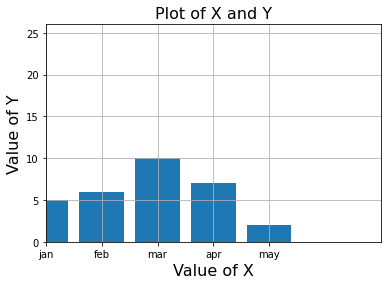

In [61]:
#Custom plot with Matplot lib

import matplotlib.pyplot as plt
x = ['jan','feb','mar','apr','may']
y = [5,6,10,7,2]
# Labels are simple
plt.bar(x, y) #,'r--') # red dashes
plt.axis([0,6,0,26]) # a list in the form [xmin, xmax, ymin, ymax]
plt.xlabel("Value of X", fontsize=16)
plt.ylabel("Value of Y", fontsize=16)
plt.title("Plot of X and Y", fontsize=16)
plt.grid(True)
plt.show()

In [62]:
df = pd.DataFrame( { 'month' : x, 'value' : y})
df

,month,value
0,jan,5
1,feb,6
2,mar,10
3,apr,7
4,may,2


<AxesSubplot:xlabel='month'>

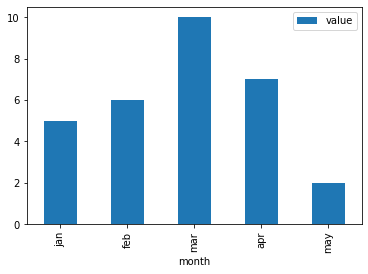

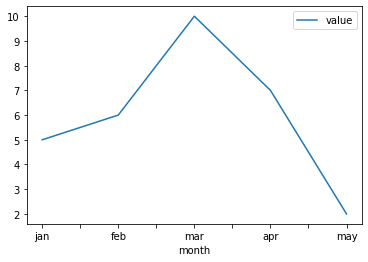

In [68]:
# Pandas Inline Plot
df.plot(kind="bar", x = "month", y="value")
df.plot(kind="line", x = "month", y="value")


In [70]:

# Plotly express Inline Plot
import plotly.express as px
px.bar(df, x="month", y = "value")

In [69]:
px.line(df, x="month", y = "value")

In [71]:
import folium

m = folium.Map()

In [73]:
m.add_child(folium.Marker(location=(0,0), popup="hello"))
m

In [74]:
locations = pd.DataFrame( { 'lat': [34, 56, -30], 'lon' : [-75, 85, 100], 'place' : ['home', 'work', 'bar']})
locations

,lat,lon,place
0,34,-75,home
1,56,85,work
2,-30,100,bar


In [76]:
m1 = folium.Map()
for row  in locations.to_records():
    marker = folium.Marker(location=(row['lat'], row['lon']), popup=row['place'])
    m1.add_child(marker)

In [77]:
m1